# Predicting the stock price for the infosys data

In [4]:
import tensorflow as t2
from tensorflow import keras
from sklearn.metrics import mean_squared_error


# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Read the Dataset

In [5]:
import pandas as pd

infosys = pd.read_csv('infosys.csv')

infosys.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,4/20/2022,20.68,20.730000,20.459999,20.570000,20.123756,10019600
1,4/21/2022,20.85,20.930000,20.629999,20.680000,20.231373,21840600
2,4/22/2022,20.51,20.610001,20.120001,20.260000,19.820482,11983400
3,4/25/2022,20.17,20.410000,20.030001,20.410000,19.967228,8778400
4,4/26/2022,20.25,20.379999,20.059999,20.120001,19.683521,13027100


In [6]:
infosys

,Date,Open,High,Low,Close,Adj Close,Volume
0,4/20/2022,20.680000,20.730000,20.459999,20.570000,20.123756,10019600
1,4/21/2022,20.850000,20.930000,20.629999,20.680000,20.231373,21840600
2,4/22/2022,20.510000,20.610001,20.120001,20.260000,19.820482,11983400
3,4/25/2022,20.170000,20.410000,20.030001,20.410000,19.967228,8778400
4,4/26/2022,20.250000,20.379999,20.059999,20.120001,19.683521,13027100
...,...,...,...,...,...,...,...
95,9/6/2022,18.139999,18.219999,17.930000,17.980000,17.786531,7158700
96,9/7/2022,18.139999,18.450001,18.110001,18.430000,18.231689,4769300
97,9/8/2022,18.350000,18.530001,18.280001,18.530001,18.330614,3936900
98,9/9/2022,18.770000,19.100000,18.750000,19.059999,18.854910,5513600


In [7]:
#Drop the columns we don't need

infosys = infosys.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)


In [8]:
infosys

,Date,Close
0,4/20/2022,20.570000
1,4/21/2022,20.680000
2,4/22/2022,20.260000
3,4/25/2022,20.410000
4,4/26/2022,20.120001
...,...,...
95,9/6/2022,17.980000
96,9/7/2022,18.430000
97,9/8/2022,18.530001
98,9/9/2022,19.059999


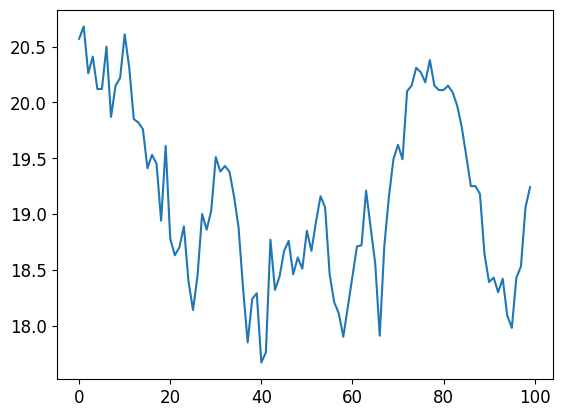

In [9]:
#Plot temp

plt.plot(infosys['Close'])
plt.show()

# Data Cleanup

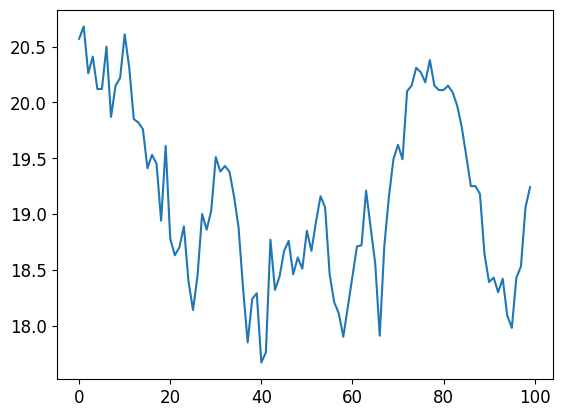

In [10]:
plt.plot(infosys['Close'])
plt.show()

In [11]:
# Remove all null values

infosys = infosys.dropna().reset_index(drop=True)

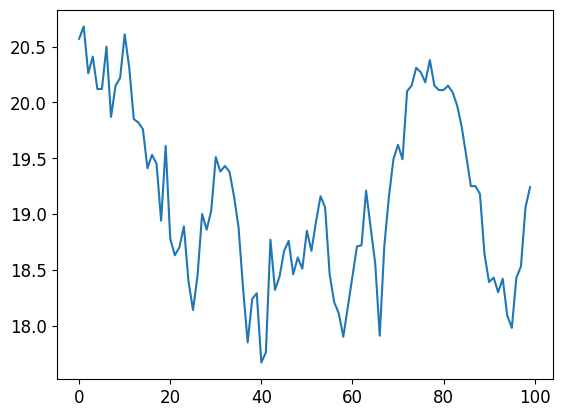

In [12]:
plt.plot(infosys['Close'])
plt.show()

## RESHAPE the data set!

In [13]:
infosys.shape

(100, 2)

In [14]:
# Re-organize the data set by day and hours

stock_market = np.array(infosys['Close']).reshape(10,10)

stock_market

array([[20.57    , 20.68    , 20.26    , 20.41    , 20.120001, 20.120001,
        20.5     , 19.870001, 20.15    , 20.219999],
       [20.610001, 20.309999, 19.85    , 19.82    , 19.76    , 19.41    ,
        19.530001, 19.450001, 18.940001, 19.610001],
       [18.780001, 18.629999, 18.700001, 18.889999, 18.4     , 18.139999,
        18.450001, 19.      , 18.860001, 19.030001],
       [19.51    , 19.379999, 19.43    , 19.379999, 19.16    , 18.879999,
        18.33    , 17.85    , 18.24    , 18.290001],
       [17.67    , 17.76    , 18.77    , 18.32    , 18.440001, 18.67    ,
        18.76    , 18.459999, 18.610001, 18.51    ],
       [18.85    , 18.67    , 18.93    , 19.16    , 19.059999, 18.459999,
        18.209999, 18.110001, 17.9     , 18.17    ],
       [18.440001, 18.709999, 18.719999, 19.209999, 18.879999, 18.559999,
        17.91    , 18.709999, 19.15    , 19.49    ],
       [19.620001, 19.49    , 20.1     , 20.15    , 20.309999, 20.27    ,
        20.18    , 20.379999, 20.15  

In [15]:
# Convert to dataframe

stock_market_df = pd.DataFrame(stock_market, columns=np.arange(0,10,1))

stock_market_df

,0,1,2,3,4,5,6,7,8,9
0,20.570000,20.680000,20.260000,20.410000,20.120001,20.120001,20.500000,19.870001,20.150000,20.219999
1,20.610001,20.309999,19.850000,19.820000,19.760000,19.410000,19.530001,19.450001,18.940001,19.610001
2,18.780001,18.629999,18.700001,18.889999,18.400000,18.139999,18.450001,19.000000,18.860001,19.030001
3,19.510000,19.379999,19.430000,19.379999,19.160000,18.879999,18.330000,17.850000,18.240000,18.290001
4,17.670000,17.760000,18.770000,18.320000,18.440001,18.670000,18.760000,18.459999,18.610001,18.510000
5,18.850000,18.670000,18.930000,19.160000,19.059999,18.459999,18.209999,18.110001,17.900000,18.170000
6,18.440001,18.709999,18.719999,19.209999,18.879999,18.559999,17.910000,18.709999,19.150000,19.490000
7,19.620001,19.490000,20.100000,20.150000,20.309999,20.270000,20.180000,20.379999,20.150000,20.110001
8,20.110001,20.150000,20.090000,19.969999,19.780001,19.520000,19.250000,19.250000,19.180000,18.639999
9,18.389999,18.430000,18.299999,18.420000,18.090000,17.980000,18.430000,18.530001,19.059999,19.240000


# Reshape for Standardizing Data

In [16]:
# Let's create a single sequence (i.e., feature) for standardization

stock_market_feature = np.array(stock_market_df).ravel().reshape(-1,1)

stock_market_feature.shape

(100, 1)

In [17]:
stock_market_feature

array([[20.57    ],
       [20.68    ],
       [20.26    ],
       [20.41    ],
       [20.120001],
       [20.120001],
       [20.5     ],
       [19.870001],
       [20.15    ],
       [20.219999],
       [20.610001],
       [20.309999],
       [19.85    ],
       [19.82    ],
       [19.76    ],
       [19.41    ],
       [19.530001],
       [19.450001],
       [18.940001],
       [19.610001],
       [18.780001],
       [18.629999],
       [18.700001],
       [18.889999],
       [18.4     ],
       [18.139999],
       [18.450001],
       [19.      ],
       [18.860001],
       [19.030001],
       [19.51    ],
       [19.379999],
       [19.43    ],
       [19.379999],
       [19.16    ],
       [18.879999],
       [18.33    ],
       [17.85    ],
       [18.24    ],
       [18.290001],
       [17.67    ],
       [17.76    ],
       [18.77    ],
       [18.32    ],
       [18.440001],
       [18.67    ],
       [18.76    ],
       [18.459999],
       [18.610001],
       [18.51    ],


## Standardize the values

In [18]:
# Next, standardize

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

stock_market_std = scaler.fit_transform(stock_market_feature)

In [19]:
stock_market_reshaped =stock_market_std.reshape(10,10)

stock_market_reshaped.shape

(10, 10)

In [20]:
#Pandas version of the reshaped data

pd.DataFrame(stock_market_reshaped)

,0,1,2,3,4,5,6,7,8,9
0,1.826634,1.967499,1.429651,1.621739,1.250370,1.250370,1.736993,0.930222,1.288786,1.378426
1,1.877859,1.493679,0.904609,0.866191,0.789356,0.341149,0.494821,0.392374,-0.260727,0.597269
2,-0.465621,-0.657712,-0.568068,-0.324759,-0.952247,-1.285202,-0.888216,-0.183893,-0.363174,-0.145474
3,0.469208,0.302730,0.366761,0.302730,0.021002,-0.337565,-1.041888,-1.656571,-1.157141,-1.093110
4,-1.887078,-1.771825,-0.478428,-1.054694,-0.901022,-0.606487,-0.491234,-0.875413,-0.683322,-0.811382
5,-0.375981,-0.606487,-0.273534,0.021002,-0.107059,-0.875413,-1.195560,-1.323617,-1.592542,-1.246783
6,-0.901022,-0.555265,-0.542459,0.085030,-0.337565,-0.747354,-1.579736,-0.555265,0.008196,0.443596
7,0.610074,0.443596,1.224756,1.288786,1.493679,1.442457,1.327204,1.583320,1.288786,1.237564
8,1.237564,1.288786,1.211951,1.058278,0.814969,0.482014,0.136255,0.136255,0.046614,-0.644906
9,-0.965054,-0.913829,-1.080307,-0.926635,-1.349230,-1.490095,-0.913829,-0.785769,-0.107059,0.123449


# Split the Data

**In certain cases, we cannot use a random split. For example, if we are trying to predict the stock market, we cannot use a random split. We need to use a chronological split.**

BUT, keep in mind if we have something like hourly readings of dayly temperature, we can use a random split on days, but the sequence of the temperature within the day is important to remain sequential.

In this case, we are using a random spli because each day as an independent sample.

In [21]:
from sklearn.model_selection import train_test_split

#train, test = train_test_split(temp_reshaped, test_size=0.3)

# if we neede to maintain the ordering of the data, we can use the following code to split the data
split_point = int(len(stock_market_reshaped)*0.7)
train, test = stock_market_reshaped[:split_point], stock_market_reshaped[split_point:]

In [22]:
train.shape

(7, 10)

In [23]:
train

array([[ 1.82663383,  1.96749875,  1.42965088,  1.6217394 ,  1.25036954,
         1.25036954,  1.73699252,  0.930222  ,  1.28878596,  1.37842599],
       [ 1.87785872,  1.49367911,  0.90460891,  0.86619121,  0.7893558 ,
         0.34114924,  0.49482134,  0.39237413, -0.26072685,  0.59726856],
       [-0.46562128, -0.65771236, -0.56806849, -0.32475892, -0.95224682,
        -1.28520154, -0.88821603, -0.18389272, -0.36317406, -0.14547374],
       [ 0.46920826,  0.30273026,  0.36676105,  0.30273026,  0.0210017 ,
        -0.33756482, -1.04188813, -1.65657141, -1.15714124, -1.09311045],
       [-1.88707763, -1.77182452, -0.47842846, -1.05469403, -0.90102193,
        -0.60648747, -0.49123436, -0.87541269, -0.6833216 , -0.8113819 ],
       [-0.37598125, -0.60648747, -0.27353403,  0.0210017 , -0.10705859,
        -0.87541269, -1.19556023, -1.32361668, -1.5925419 , -1.24678255],
       [-0.90102193, -0.55526515, -0.54245925,  0.08502993, -0.33756482,
        -0.74735367, -1.579736  , -0.55526515

In [24]:
test.shape

(3, 10)

In [25]:
test

array([[ 0.61007446,  0.44359646,  1.22475645,  1.28878596,  1.49367911,
         1.44245678,  1.32720367,  1.58332042,  1.28878596,  1.23756364],
       [ 1.23756364,  1.28878596,  1.21195055,  1.05827845,  0.81496888,
         0.48201416,  0.13625482,  0.13625482,  0.04661351, -0.64490646],
       [-0.965054  , -0.91382911, -1.08030711, -0.92663501, -1.34922977,
        -1.49009468, -0.91382911, -0.78576882, -0.10705859,  0.12344892]])

# Create Input and Target values

The first 23 hours will be input to predict the 24th hour reading (i.e., target)

In [26]:
train_inputs = train[:,:9]


pd.DataFrame(train_inputs)

,0,1,2,3,4,5,6,7,8
0,1.826634,1.967499,1.429651,1.621739,1.250370,1.250370,1.736993,0.930222,1.288786
1,1.877859,1.493679,0.904609,0.866191,0.789356,0.341149,0.494821,0.392374,-0.260727
2,-0.465621,-0.657712,-0.568068,-0.324759,-0.952247,-1.285202,-0.888216,-0.183893,-0.363174
3,0.469208,0.302730,0.366761,0.302730,0.021002,-0.337565,-1.041888,-1.656571,-1.157141
4,-1.887078,-1.771825,-0.478428,-1.054694,-0.901022,-0.606487,-0.491234,-0.875413,-0.683322
5,-0.375981,-0.606487,-0.273534,0.021002,-0.107059,-0.875413,-1.195560,-1.323617,-1.592542
6,-0.901022,-0.555265,-0.542459,0.085030,-0.337565,-0.747354,-1.579736,-0.555265,0.008196


## Add one more dimension to make it ready for RNNs

See here for more details: https://keras.io/layers/recurrent/, and https://shiva-verma.medium.com/understanding-input-and-output-shape-in-lstm-keras-c501ee95c65e


In [27]:
train_inputs

array([[ 1.82663383,  1.96749875,  1.42965088,  1.6217394 ,  1.25036954,
         1.25036954,  1.73699252,  0.930222  ,  1.28878596],
       [ 1.87785872,  1.49367911,  0.90460891,  0.86619121,  0.7893558 ,
         0.34114924,  0.49482134,  0.39237413, -0.26072685],
       [-0.46562128, -0.65771236, -0.56806849, -0.32475892, -0.95224682,
        -1.28520154, -0.88821603, -0.18389272, -0.36317406],
       [ 0.46920826,  0.30273026,  0.36676105,  0.30273026,  0.0210017 ,
        -0.33756482, -1.04188813, -1.65657141, -1.15714124],
       [-1.88707763, -1.77182452, -0.47842846, -1.05469403, -0.90102193,
        -0.60648747, -0.49123436, -0.87541269, -0.6833216 ],
       [-0.37598125, -0.60648747, -0.27353403,  0.0210017 , -0.10705859,
        -0.87541269, -1.19556023, -1.32361668, -1.5925419 ],
       [-0.90102193, -0.55526515, -0.54245925,  0.08502993, -0.33756482,
        -0.74735367, -1.579736  , -0.55526515,  0.0081958 ]])

In [28]:
train_inputs.shape 

(7, 9)

In [29]:
#Create an additional dimension for train

train_x = train_inputs[:,:,np.newaxis]

train_x.shape 

(7, 9, 1)

In [30]:
train_x

array([[[ 1.82663383],
        [ 1.96749875],
        [ 1.42965088],
        [ 1.6217394 ],
        [ 1.25036954],
        [ 1.25036954],
        [ 1.73699252],
        [ 0.930222  ],
        [ 1.28878596]],

       [[ 1.87785872],
        [ 1.49367911],
        [ 0.90460891],
        [ 0.86619121],
        [ 0.7893558 ],
        [ 0.34114924],
        [ 0.49482134],
        [ 0.39237413],
        [-0.26072685]],

       [[-0.46562128],
        [-0.65771236],
        [-0.56806849],
        [-0.32475892],
        [-0.95224682],
        [-1.28520154],
        [-0.88821603],
        [-0.18389272],
        [-0.36317406]],

       [[ 0.46920826],
        [ 0.30273026],
        [ 0.36676105],
        [ 0.30273026],
        [ 0.0210017 ],
        [-0.33756482],
        [-1.04188813],
        [-1.65657141],
        [-1.15714124]],

       [[-1.88707763],
        [-1.77182452],
        [-0.47842846],
        [-1.05469403],
        [-0.90102193],
        [-0.60648747],
        [-0.49123436],
   

## Set the target

In [31]:
# The last column (23) is TARGET

train_target = train[:,-1]


pd.DataFrame(train_target, columns=['9'])

,9
0,1.378426
1,0.597269
2,-0.145474
3,-1.093110
4,-0.811382
5,-1.246783
6,0.443596


## Repeat for TEST

In [32]:
test.shape

(3, 10)

In [33]:
test

array([[ 0.61007446,  0.44359646,  1.22475645,  1.28878596,  1.49367911,
         1.44245678,  1.32720367,  1.58332042,  1.28878596,  1.23756364],
       [ 1.23756364,  1.28878596,  1.21195055,  1.05827845,  0.81496888,
         0.48201416,  0.13625482,  0.13625482,  0.04661351, -0.64490646],
       [-0.965054  , -0.91382911, -1.08030711, -0.92663501, -1.34922977,
        -1.49009468, -0.91382911, -0.78576882, -0.10705859,  0.12344892]])

In [34]:
test_inputs = test[:, :9]

In [35]:
test_inputs

array([[ 0.61007446,  0.44359646,  1.22475645,  1.28878596,  1.49367911,
         1.44245678,  1.32720367,  1.58332042,  1.28878596],
       [ 1.23756364,  1.28878596,  1.21195055,  1.05827845,  0.81496888,
         0.48201416,  0.13625482,  0.13625482,  0.04661351],
       [-0.965054  , -0.91382911, -1.08030711, -0.92663501, -1.34922977,
        -1.49009468, -0.91382911, -0.78576882, -0.10705859]])

In [36]:
#Create an additional dimension for test

test_x = test_inputs[:,:,np.newaxis]

test_x.shape 

(3, 9, 1)

In [37]:
test_target = test[:,-1]


pd.DataFrame(test_target, columns=['9'])

,9
0,1.237564
1,-0.644906
2,0.123449


In [38]:
performance = pd.DataFrame({"model":[], "MSE":[]})

# A normal (cross-sectional) NN

This model assumes that the data is NOT a time-series data set. It treats the data as cross-sectional and the columns being independent of each other.

In [39]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 1]),
    keras.layers.Dense(23, activation='relu'),
    keras.layers.Dense(1, activation=None)
    
])

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.9176
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 1.8542
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 1.7917
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 1.7305
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 1.6707
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 1.6124
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 1.5556
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 1.4995
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 1.4449
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 1.3918
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 1.3401
Epoch 12/100
1/1 [==============================] - 0s 18ms/step - loss: 1.2889
Epoch 13/100
1/1 [==============================] - 0s 5ms/

### Predictions

In [40]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 175ms/step


In [41]:
# Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [42]:
comparison

,actual,predicted
0,20.110001,20.098734
1,18.639999,19.626362
2,19.240000,18.793509


In [43]:
cs_nn = mean_squared_error(comparison['actual'], comparison['predicted'])

In [44]:
performance = pd.concat([performance, pd.DataFrame({'model':"Cross NN", 'MSE': cs_nn}, index =[0])])
performance

,model,MSE
0,Cross NN,0.390798


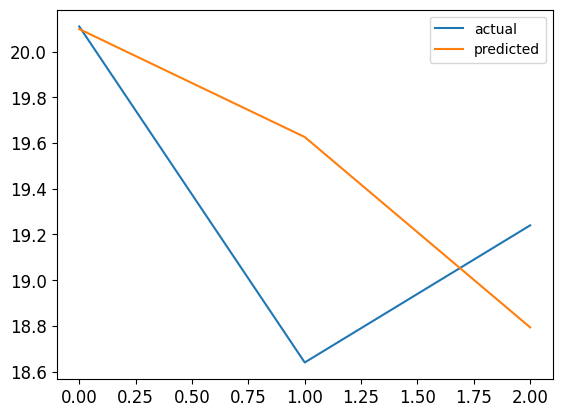

In [45]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# Simple RNN

Simplest recurrent neural network

In [46]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [47]:
np.random.seed(42)
t2.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 0.5368
Epoch 2/30
1/1 [==============================] - 0s 7ms/step - loss: 0.5060
Epoch 3/30
1/1 [==============================] - 0s 12ms/step - loss: 0.4790
Epoch 4/30
1/1 [==============================] - 0s 17ms/step - loss: 0.4523
Epoch 5/30
1/1 [==============================] - 0s 6ms/step - loss: 0.4269
Epoch 6/30
1/1 [==============================] - 0s 16ms/step - loss: 0.4031
Epoch 7/30
1/1 [==============================] - 0s 12ms/step - loss: 0.3802
Epoch 8/30
1/1 [==============================] - 0s 19ms/step - loss: 0.3580
Epoch 9/30
1/1 [==============================] - 0s 6ms/step - loss: 0.3364
Epoch 10/30
1/1 [==============================] - 0s 14ms/step - loss: 0.3156
Epoch 11/30
1/1 [==============================] - 0s 8ms/step - loss: 0.2955
Epoch 12/30
1/1 [==============================] - 0s 10ms/step - loss: 0.2765
Epoch 13/30
1/1 [==============================] - 0s 20ms/step - l

### Predictions

In [48]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 506ms/step


In [49]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [50]:
comparison

,actual,predicted
0,20.110001,20.332853
1,18.639999,19.534855
2,19.240000,18.836637


In [51]:
s_rnn = mean_squared_error(comparison['actual'], comparison['predicted'])

In [52]:
performance = pd.concat([performance, pd.DataFrame({'model':"Simple RNN", 'MSE' : s_rnn}, index =[0])])
performance

,model,MSE
0,Cross NN,0.390798
0,Simple RNN,0.337711


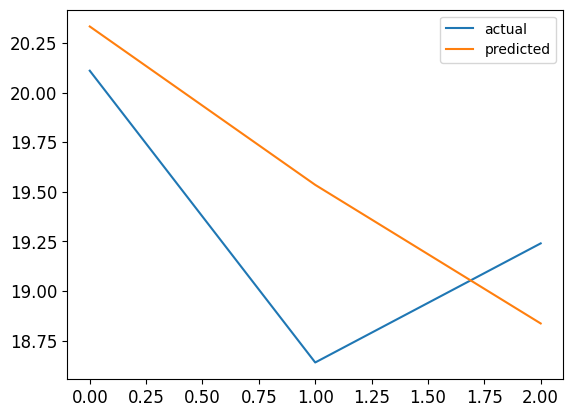

In [53]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## Simple RNN with more layers

**Be careful: when stacking RNN layers, you have to set "return_sequences" to True. This enables the layer to send a "sequence" of values to the next layer -- jut like how it uses a sequence of values for training. However, if the output of RNN is sent to a DENSE layer, then a single value should be sent. That's why there is no "return sequences" right before DENSE layers.**

In [54]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [55]:
np.random.seed(42)
t2.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 3s 3s/step - loss: 0.7852
Epoch 2/30
1/1 [==============================] - 0s 22ms/step - loss: 0.6917
Epoch 3/30
1/1 [==============================] - 0s 18ms/step - loss: 0.6173
Epoch 4/30
1/1 [==============================] - 0s 13ms/step - loss: 0.5518
Epoch 5/30
1/1 [==============================] - 0s 18ms/step - loss: 0.4959
Epoch 6/30
1/1 [==============================] - 0s 13ms/step - loss: 0.4535
Epoch 7/30
1/1 [==============================] - 0s 46ms/step - loss: 0.4192
Epoch 8/30
1/1 [==============================] - 0s 20ms/step - loss: 0.3843
Epoch 9/30
1/1 [==============================] - 0s 20ms/step - loss: 0.3480
Epoch 10/30
1/1 [==============================] - 0s 24ms/step - loss: 0.3118
Epoch 11/30
1/1 [==============================] - 0s 10ms/step - loss: 0.2772
Epoch 12/30
1/1 [==============================] - 0s 18ms/step - loss: 0.2447
Epoch 13/30
1/1 [==============================] - 0s 12ms/step

### Predictions

In [56]:
#Predict:
y_pred = model.predict(test_x)


1/1 [==============================] - 1s 818ms/step


In [57]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [58]:
comparison

,actual,predicted
0,20.110001,19.724728
1,18.639999,19.508816
2,19.240000,19.089840


In [59]:
sml_rnn = mean_squared_error(comparison['actual'], comparison['predicted'])

In [60]:
performance = pd.concat([performance, pd.DataFrame({'model':"Simple RNN more layers", 'MSE' : sml_rnn}, index =[0])])
performance

,model,MSE
0,Cross NN,0.390798
0,Simple RNN,0.337711
0,Simple RNN more layers,0.308609


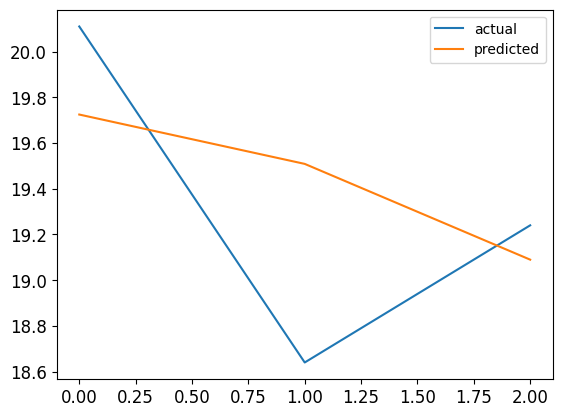

In [61]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# LSTM with one layer

In [62]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [63]:
np.random.seed(42)
t2.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 4s 4s/step - loss: 0.9677
Epoch 2/30
1/1 [==============================] - 0s 8ms/step - loss: 0.9476
Epoch 3/30
1/1 [==============================] - 0s 11ms/step - loss: 0.9278
Epoch 4/30
1/1 [==============================] - 0s 12ms/step - loss: 0.9084
Epoch 5/30
1/1 [==============================] - 0s 10ms/step - loss: 0.8894
Epoch 6/30
1/1 [==============================] - 0s 18ms/step - loss: 0.8708
Epoch 7/30
1/1 [==============================] - 0s 13ms/step - loss: 0.8525
Epoch 8/30
1/1 [==============================] - 0s 16ms/step - loss: 0.8345
Epoch 9/30
1/1 [==============================] - 0s 10ms/step - loss: 0.8168
Epoch 10/30
1/1 [==============================] - 0s 9ms/step - loss: 0.7994
Epoch 11/30
1/1 [==============================] - 0s 11ms/step - loss: 0.7824
Epoch 12/30
1/1 [==============================] - 0s 12ms/step - loss: 0.7657
Epoch 13/30
1/1 [==============================] - 0s 12ms/step -

### Predictions

In [64]:
#Predict:
y_pred = model.predict(test_x)


1/1 [==============================] - 0s 325ms/step


In [65]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [66]:
lstm_1 = mean_squared_error(comparison['actual'], comparison['predicted'])

In [67]:
performance = pd.concat([performance, pd.DataFrame({'model':"LSTM", 'MSE' : lstm_1}, index =[0])])
performance

,model,MSE
0,Cross NN,0.390798
0,Simple RNN,0.337711
0,Simple RNN more layers,0.308609
0,LSTM,0.394073


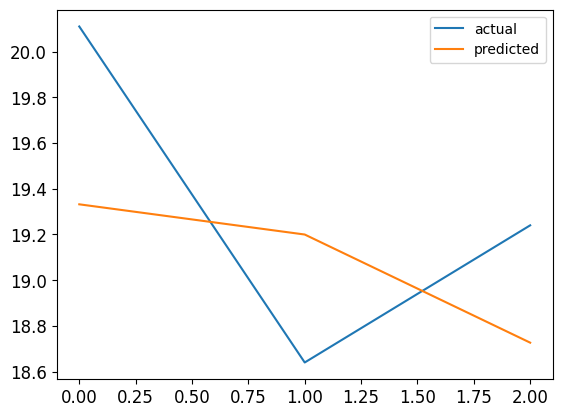

In [68]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# LSTM with more layers

In [69]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='tanh', return_sequences=True, input_shape=[9, 1]),
    keras.layers.LSTM(32, activation='tanh', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [70]:
np.random.seed(42)
t2.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 11s 11s/step - loss: 0.7804
Epoch 2/30
1/1 [==============================] - 0s 16ms/step - loss: 0.7299
Epoch 3/30
1/1 [==============================] - 0s 23ms/step - loss: 0.6822
Epoch 4/30
1/1 [==============================] - 0s 23ms/step - loss: 0.6371
Epoch 5/30
1/1 [==============================] - 0s 32ms/step - loss: 0.5947
Epoch 6/30
1/1 [==============================] - 0s 37ms/step - loss: 0.5550
Epoch 7/30
1/1 [==============================] - 0s 79ms/step - loss: 0.5181
Epoch 8/30
1/1 [==============================] - 0s 39ms/step - loss: 0.4841
Epoch 9/30
1/1 [==============================] - 0s 34ms/step - loss: 0.4533
Epoch 10/30
1/1 [==============================] - 0s 35ms/step - loss: 0.4257
Epoch 11/30
1/1 [==============================] - 0s 25ms/step - loss: 0.4018
Epoch 12/30
1/1 [==============================] - 0s 25ms/step - loss: 0.3819
Epoch 13/30
1/1 [==============================] - 0s 22ms/st

### Predictions

In [71]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 3s 3s/step


In [72]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [73]:
lstm = mean_squared_error(comparison['actual'], comparison['predicted'])

In [74]:
performance = pd.concat([performance, pd.DataFrame({'model':"lstm more layers", 'MSE' : lstm}, index =[0])])
performance

,model,MSE
0,Cross NN,0.390798
0,Simple RNN,0.337711
0,Simple RNN more layers,0.308609
0,LSTM,0.394073
0,lstm more layers,0.406428


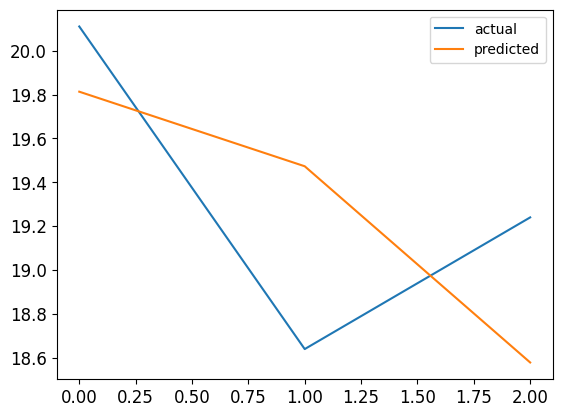

In [75]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# GRU (with more layers)

In [76]:
model = keras.models.Sequential([
    keras.layers.GRU(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [77]:
np.random.seed(42)
t2.random.set_seed(42)

model.compile(loss="mse", optimizer='RMSprop')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 8s 8s/step - loss: 0.9152
Epoch 2/30
1/1 [==============================] - 0s 16ms/step - loss: 0.8303
Epoch 3/30
1/1 [==============================] - 0s 16ms/step - loss: 0.7781
Epoch 4/30
1/1 [==============================] - 0s 19ms/step - loss: 0.7368
Epoch 5/30
1/1 [==============================] - 0s 15ms/step - loss: 0.7043
Epoch 6/30
1/1 [==============================] - 0s 22ms/step - loss: 0.6740
Epoch 7/30
1/1 [==============================] - 0s 21ms/step - loss: 0.6446
Epoch 8/30
1/1 [==============================] - 0s 14ms/step - loss: 0.6171
Epoch 9/30
1/1 [==============================] - 0s 14ms/step - loss: 0.5911
Epoch 10/30
1/1 [==============================] - 0s 18ms/step - loss: 0.5658
Epoch 11/30
1/1 [==============================] - 0s 22ms/step - loss: 0.5420
Epoch 12/30
1/1 [==============================] - 0s 15ms/step - loss: 0.5186
Epoch 13/30
1/1 [==============================] - 0s 26ms/step

### Predictions

In [78]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 1s/step


In [79]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [80]:
gru_more = mean_squared_error(comparison['actual'], comparison['predicted'])

In [81]:
performance = pd.concat([performance, pd.DataFrame({'model':"GRU more layers", 'MSE' : gru_more}, index =[0])])
performance

,model,MSE
0,Cross NN,0.390798
0,Simple RNN,0.337711
0,Simple RNN more layers,0.308609
0,LSTM,0.394073
0,lstm more layers,0.406428
0,GRU more layers,0.345251


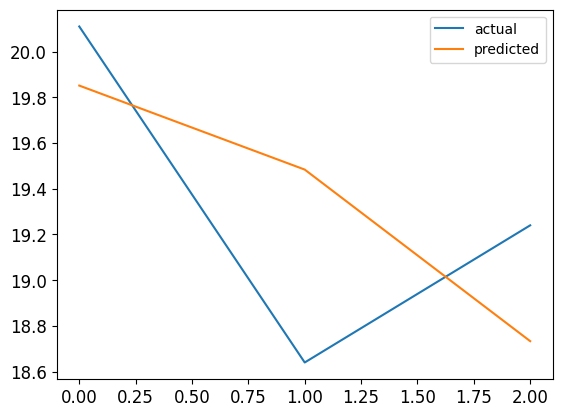

In [82]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# Conv1D

### Last Layer: GRU (you can change it to SimpleRNN or LSTM as well)

In [83]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=3, strides=1, padding="valid", input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=True),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [84]:
np.random.seed(42)
t2.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 9s 9s/step - loss: 0.9325
Epoch 2/30
1/1 [==============================] - 0s 26ms/step - loss: 0.8922
Epoch 3/30
1/1 [==============================] - 0s 20ms/step - loss: 0.8549
Epoch 4/30
1/1 [==============================] - 0s 20ms/step - loss: 0.8197
Epoch 5/30
1/1 [==============================] - 0s 21ms/step - loss: 0.7862
Epoch 6/30
1/1 [==============================] - 0s 16ms/step - loss: 0.7541
Epoch 7/30
1/1 [==============================] - 0s 19ms/step - loss: 0.7233
Epoch 8/30
1/1 [==============================] - 0s 17ms/step - loss: 0.6947
Epoch 9/30
1/1 [==============================] - 0s 21ms/step - loss: 0.6681
Epoch 10/30
1/1 [==============================] - 0s 18ms/step - loss: 0.6429
Epoch 11/30
1/1 [==============================] - 0s 16ms/step - loss: 0.6184
Epoch 12/30
1/1 [==============================] - 0s 16ms/step - loss: 0.5944
Epoch 13/30
1/1 [==============================] - 0s 26ms/step

### Predictions

In [85]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 1s/step


In [86]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [87]:
conv1d = mean_squared_error(comparison['actual'], comparison['predicted'])

In [90]:
performance = pd.concat([performance, pd.DataFrame({'model':"conv1D", 'MSE' : conv1d}, index =[0])])
performance

,model,MSE
0,Cross NN,0.390798
0,Simple RNN,0.337711
0,Simple RNN more layers,0.308609
0,LSTM,0.394073
0,lstm more layers,0.406428
0,GRU more layers,0.345251
0,conv1D,0.447185
0,conv1D,0.447185


In [89]:
performance.sort_values(by='MSE')

,model,MSE
0,Simple RNN more layers,0.308609
0,Simple RNN,0.337711
0,GRU more layers,0.345251
0,Cross NN,0.390798
0,LSTM,0.394073
0,lstm more layers,0.406428
0,conv1D,0.447185


### Analysis
The simple RNN with more layers has less mean square error of 0.308,which indicates that its the best model out off the models that we have considered.The simple RNN without additional layers has less mean square error value followed by the GRU with more layers which suggests that these are the next better performing model after the simple RNN with more layers.And the LSTM with more layers and the conv 1d models have the highest meann sqaured error out of all the models which indicates that they are least performing models out of all the all the models.
As a result, we can conclude that the simple RNN with additional layers is the best performing model of all, and we can learn more about the rationale of the result through further study and comparison of various metrics.